Import

In [496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

-------------------------------------------------Data exploration-------------------------------------------------

In [497]:
df = pd.read_csv("CarPrice.csv")
show_df = pd.read_csv("CarPrice.csv")
forEncode = pd.read_csv("CarPrice.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [498]:
print('See all variables')
df.columns

See all variables


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [499]:
print('Sample datas')
df.sample(n=10)

Sample datas


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
11,12,0,bmw 320i,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925.0
156,157,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938.0
157,158,0,toyota corolla 1200,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198.0
191,192,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295.0
13,14,0,bmw x3,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105.0
29,30,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964.0
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
140,141,2,subaru dl,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603.0
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0


In [500]:
print('Describe data all column')
df.describe()

Describe data all column


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [501]:
print('Remove some column')
df.drop('car_ID', inplace=True, axis=1)
df.drop('CarName', inplace=True, axis=1)
show_df.drop('car_ID', inplace=True, axis=1)
show_df.drop('CarName', inplace=True, axis=1)
forEncode.drop('car_ID', inplace=True, axis=1)
forEncode.drop('CarName', inplace=True, axis=1)
df

Remove some column


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [502]:
print('Get info of datatype in all column')
df.info()

Get info of datatype in all column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio

In [503]:
print('Fill null data')
df.fillna(0)
show_df.fillna(0)
forEncode.fillna(0)
df

Fill null data


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


------------------------------------------Data Tranform and Feature Selection------------------------------------------

In [504]:
print('Choose only continuous data.')
# df.drop('symboling', inplace=True, axis=1)
df = df.select_dtypes(exclude='object')
show_df = df.select_dtypes(exclude='object')
df

Choose only continuous data.


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [505]:
print('Standardize data')
std_df = df
for column in std_df:
    std_df[column] = (std_df[column] - std_df[column].mean()) / std_df[column].std()
std_df

Standardize data


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.739213,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,0.027324
1,1.739213,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,0.403473
2,0.133183,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,0.602571,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938,0.403473
3,0.936198,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087,0.084279
4,0.936198,0.106848,0.206750,0.229440,0.235366,0.515545,0.218350,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789,0.522389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.472847,1.717669,1.195622,1.394830,0.726460,0.761377,0.338419,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512,0.446659
201,-1.472847,1.717669,1.195622,1.348215,0.726460,0.947672,0.338419,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151,0.722042
202,-1.472847,1.717669,1.195622,1.394830,0.726460,0.876611,1.106861,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577,1.027468
203,-1.472847,1.717669,1.195622,1.394830,0.726460,1.270327,0.434474,-1.180593,0.461055,3.236992,0.047616,-0.681618,0.119302,-0.544725,1.150765


In [506]:
print('Calculate data correlation')
corr_df = std_df.corr()
corr_df

Calculate data correlation


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


Reduce corr() to matrix


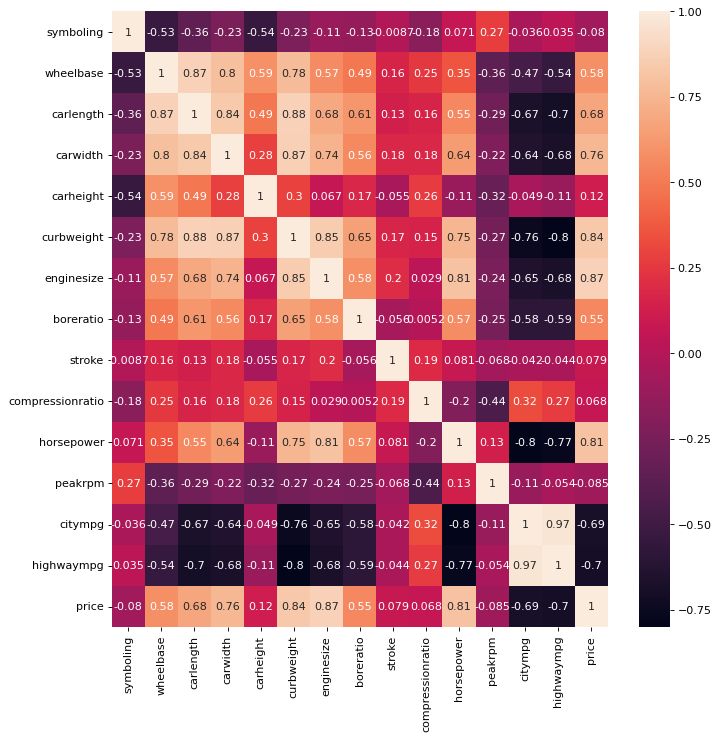

In [507]:
print('Reduce corr() to matrix')
matrix = corr_df
figure(figsize=(10, 10), dpi=80)
sns.heatmap(matrix, annot=True)
plt.show()

In [508]:
print('Drop columns if correlation value > 0.86')
# upper_tri = matrix.where(np.triu(np.ones(matrix.shape),k=1).astype(np.bool))
lower_tri = matrix.where(np.tril(np.ones(matrix.shape),k=-1).astype(np.bool))
to_drop = [column for column in lower_tri.columns if any(lower_tri[column] > 0.86)]
print(to_drop)
clean_df = show_df.drop(to_drop,axis=1)
#Standardize
for column in clean_df:
    clean_df[column] = (clean_df[column] - clean_df[column].mean()) / clean_df[column].std()
clean_df

Drop columns if correlation value > 0.86
['wheelbase', 'carlength', 'carwidth', 'enginesize', 'citympg']


C:\Users\napat\AppData\Local\Temp\ipykernel_3484\663530927.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lower_tri = matrix.where(np.tril(np.ones(matrix.shape),k=-1).astype(np.bool))


,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,1.739213,-2.015483,-0.014531,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.544725,0.027324
1,1.739213,-2.015483,-0.014531,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.544725,0.403473
2,0.133183,-0.542200,0.513625,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.689938,0.403473
3,0.936198,0.235366,-0.419770,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.109087,0.084279
4,0.936198,0.235366,0.515545,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.270789,0.522389
...,...,...,...,...,...,...,...,...,...,...
200,-1.472847,0.726460,0.761377,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.399512,0.446659
201,-1.472847,0.726460,0.947672,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.835151,0.722042
202,-1.472847,0.726460,0.876611,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.125577,1.027468
203,-1.472847,0.726460,1.270327,-1.180593,0.461055,3.236992,0.047616,-0.681618,-0.544725,1.150765


In [509]:
oneHotEncode = pd.get_dummies(forEncode.select_dtypes(include='object'), drop_first=True)
oneHotEncode

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


----------------------------------------------------PCA Dimensional Reduction----------------------------------------------------

In [510]:
df_afterEncode = pd.concat([clean_df,oneHotEncode], axis=1, join='inner')
print('PCA all variables')
pca = PCA()
df_afterEncode = df_afterEncode.drop(columns='price')
X_pca = pca.fit_transform(df_afterEncode)
X_pca
df_afterEncode

PCA all variables


,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,fueltype_gas,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.739213,-2.015483,-0.014531,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.544725,1,...,0,0,0,0,0,0,0,1,0,0
1,1.739213,-2.015483,-0.014531,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.544725,1,...,0,0,0,0,0,0,0,1,0,0
2,0.133183,-0.542200,0.513625,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.689938,1,...,0,0,0,0,0,0,0,1,0,0
3,0.936198,0.235366,-0.419770,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.109087,1,...,0,0,0,0,0,0,0,1,0,0
4,0.936198,0.235366,0.515545,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.270789,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.472847,0.726460,0.761377,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.399512,1,...,0,0,0,0,0,0,0,1,0,0
201,-1.472847,0.726460,0.947672,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.835151,1,...,0,0,0,0,0,0,0,1,0,0
202,-1.472847,0.726460,0.876611,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.125577,1,...,0,0,0,0,0,0,0,1,0,0
203,-1.472847,0.726460,1.270327,-1.180593,0.461055,3.236992,0.047616,-0.681618,-0.544725,0,...,0,0,0,0,0,1,0,0,0,0


 Visualize Explained Variance Ratio (% eigenvalues)


Text(0, 0.5, 'Explained variance ratio')

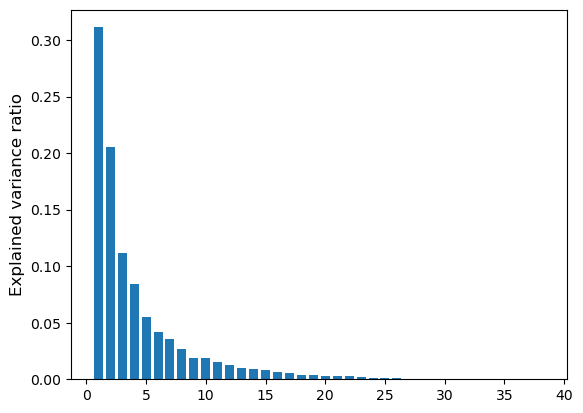

In [511]:
print(' Visualize Explained Variance Ratio (% eigenvalues)')
# fig = plt.figure(figsize =(10, 7))
explain_var = pca.explained_variance_ratio_
plt.bar([i for i in range(1,len(explain_var)+1)],explain_var,0.75) 
plt.ylabel("Explained variance ratio",fontsize = 12)

In [512]:
print('# PCA n_components (ทดลองเปลี่ยนค่า n_componentsอย่างน้อย 3 ค่า เพื่อเลือกค่าดีที่สุด)')
pca2 = PCA(n_components=5)
X_pca_2 = pca2.fit_transform(df_afterEncode)
X_pca_2

# PCA n_components (ทดลองเปลี่ยนค่า n_componentsอย่างน้อย 3 ค่า เพื่อเลือกค่าดีที่สุด)


array([[ 0.40601333, -2.15591051,  0.0782099 ,  2.54773882,  0.16347241],
       [ 0.40601333, -2.15591051,  0.0782099 ,  2.54773882,  0.16347241],
       [ 0.64728599, -1.22755928, -1.02483214, -0.74745626,  0.53743334],
       ...,
       [ 2.45855099,  0.05260381,  1.87782967, -0.28327522,  0.98550974],
       [ 1.16205627,  3.10198103, -1.66093735, -0.31368903,  2.16535289],
       [ 2.2087561 ,  0.69503486,  1.18230976, -0.54312472,  0.15101854]])

----------------------------------------------------Linear Regression----------------------------------------------------

In [513]:
Rseed = 4
X = X_pca_2
Y = df_afterEncode['carheight']
# Shuffle Split (Train / Test Split)
x_train_set, x_test, y_train_set, y_test = train_test_split(X, Y, test_size = 0.3, random_state = Rseed)
# Shuffle Split (Train / Validation Split)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)

In [514]:
# Perform Linear Regression -> All variables
lr = LinearRegression()
# Train
lr.fit(x_train, y_train)
# Validate
y_pred_lr = lr.predict(x_validate)
# Test
y_test_pred_lr = lr.predict(x_test)

In [515]:
# Measure Accuracy Validation and Test
print(r2_score(y_pred_lr, y_validate))
print(r2_score(y_test_pred_lr, y_test))
print(lr.score(x_validate, y_validate))
print(lr.score(x_test, y_test))

r2valid = []
r2valid.append(r2_score(y_pred_lr, y_validate))
r2test = []
r2test.append(r2_score(y_test_pred_lr, y_test))

msevalid = []
msevalid.append(mean_squared_error(y_pred_lr, y_validate))
msetest = []
msetest.append(mean_squared_error(y_test_pred_lr, y_test))

bar = []
bar.append('No PCA')

for i in range(6):
    pca3 = PCA(n_components=(i+1)*3)
    X_pca_3 = pca3.fit_transform(df_afterEncode)
    X = X_pca_3
    Y = df_afterEncode['carheight']
    # Shuffle Split (Train / Test Split)
    x_train_set, x_test, y_train_set, y_test = train_test_split(X, Y, test_size = 0.3, random_state = Rseed)
    # Shuffle Split (Train / Validation Split)
    x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
    # Perform Linear Regression -> All variables
    lr = LinearRegression()
    print(x_train)
    print('----------')
    print(y_train)
    # train
    lr.fit(x_train, y_train)
    # validate
    y_pred_lr = lr.predict(x_validate)
    # test
    y_test_pred_lr = lr.predict(x_test)
    # Measure Accuracy Validation and Test
    r2valid.append(r2_score(y_pred_lr, y_validate))
    r2test.append(r2_score(y_test_pred_lr, y_test))

    msevalid.append(mean_squared_error(y_pred_lr, y_validate))
    msetest.append(mean_squared_error(y_test_pred_lr, y_test))
    
    bar.append('PCA '+str((i+1)*3))

0.697987789666598
0.6495179064805918
0.738044980240709
0.6920118853288213
[[ 9.10476597e-01 -9.99911460e-01 -9.74477018e-02]
 [-1.59643424e+00  4.36949754e-01  7.28398866e-01]
 [-4.43329957e-01  3.57510639e+00 -1.32967541e+00]
 [-8.39831829e-01 -1.15895956e-01 -3.15384598e-01]
 [-8.02224725e-01 -1.09348831e-01 -3.24277841e-01]
 [ 3.06874402e+00  3.97135293e+00 -1.69913214e+00]
 [-2.98253041e+00 -8.83305242e-01 -2.24249377e-01]
 [-1.22709674e+00  1.02542415e-01  4.12303145e-01]
 [-1.29949166e+00 -5.74195826e-01 -3.05502401e-01]
 [ 2.21753666e-01 -1.26128193e+00  1.16387370e+00]
 [ 1.51784663e+00 -4.51270542e-01  1.24023543e-01]
 [ 2.62048874e+00  3.90666432e+00 -1.42039592e+00]
 [-2.09808015e+00 -2.02252929e-01 -7.50505272e-02]
 [ 1.32346679e+00 -1.53334481e+00  8.78938585e-02]
 [ 1.70620800e+00  8.13376614e-01  1.14568159e+00]
 [-2.10111799e+00  2.97076156e+00 -1.98236956e+00]
 [ 2.29005714e+00  5.55827850e-02  4.55496726e-01]
 [ 6.53932097e-01 -3.25018482e+00 -9.27021505e-01]
 [ 8.136

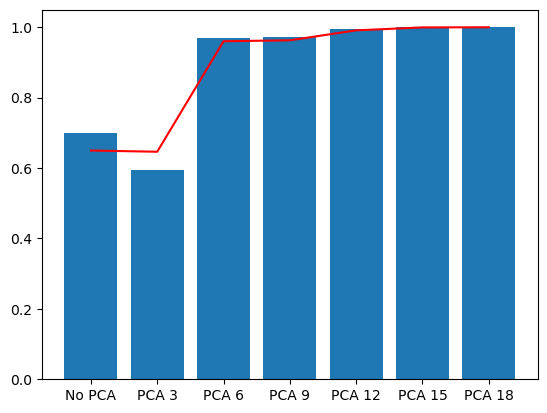

In [516]:
plt.bar(bar,r2valid)
plt.plot(r2test,color= 'r')

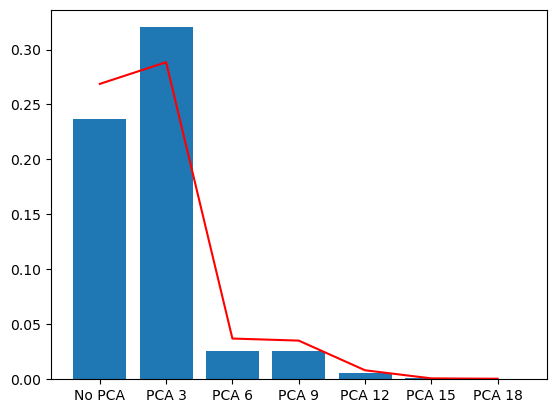

In [517]:
plt.bar(bar,msevalid)
plt.plot(msetest,color = 'r')